Weather Data Prediction Model

In [4]:
import pandas as pd

In [5]:
global_temp = pd.read_csv('weather_data.csv')

In [9]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [10]:
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [11]:
def clean_data(df):
  df = df.copy()
  df = df.drop(columns = ["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"])
  df["dt"] = pd.to_datetime(df["dt"])
  df["month"] = df["dt"].dt.month
  df["year"] = df["dt"].dt.year
  df = df.drop(columns = ["dt"], axis = 1)
  df = df.drop(columns = ["month"], axis = 1)
  df = df.dropna()
  df = df.set_index("year")
  return df

global_temp = clean_data(global_temp)
print(global_temp.head())


      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
year                                                                   
1850                   0.749               8.242              -3.206   
1850                   3.071               9.970              -2.291   
1850                   4.954              10.347              -1.905   
1850                   7.217              12.934               1.018   
1850                  10.004              15.655               3.811   

      LandAndOceanAverageTemperature  
year                                  
1850                          12.833  
1850                          13.588  
1850                          14.043  
1850                          14.667  
1850                          15.507  


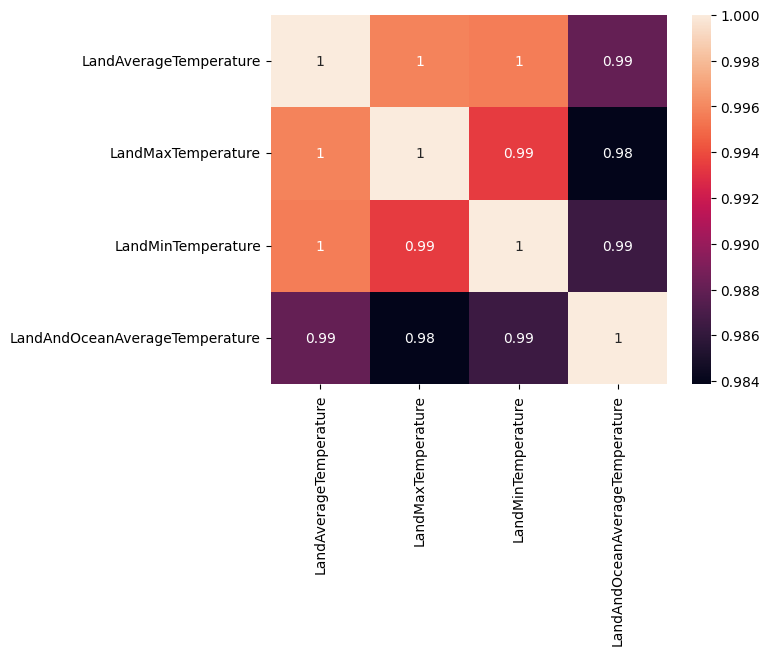

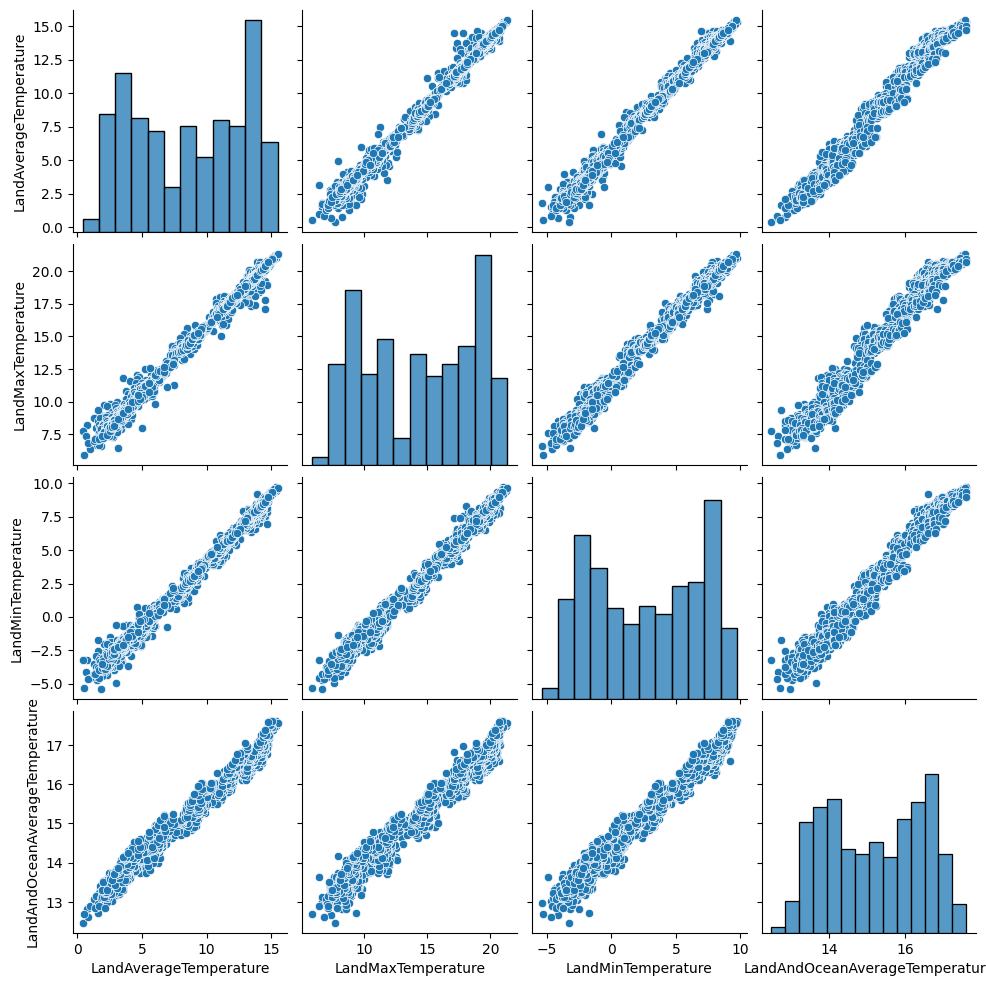

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

sns.pairplot(global_temp)
plt.show()

In [13]:

target = "LandAndOceanAverageTemperature"
X = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]
Y = global_temp[target]

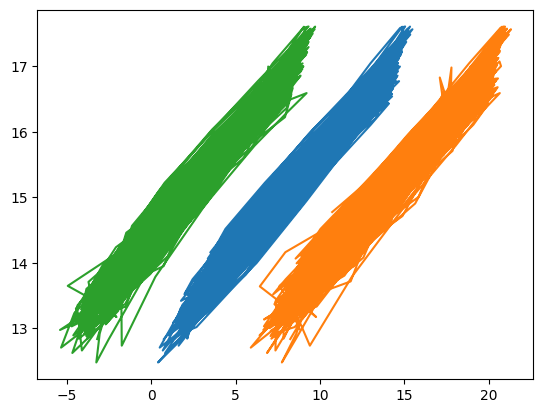

In [14]:
plt.plot(X,Y)

First to import the TrainTestSplit from sklearn


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.25, random_state=45)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


Comparing with base line matrix with mean sqauared error

In [16]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
mse = mean_squared_error(ytrain, ypred)
print("Baseline MAE:", mse)

Baseline MAE: 1.6355012942573515


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, max_depth=50, n_jobs=-1, random_state=80)
)
forest.fit(xtrain, ytrain)


Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=80))])

In [20]:
forest.score(xtrain, ytrain)

0.9971759038083774

In [21]:
import numpy as np
ypred = forest.predict(xval)
mse = mean_squared_error(yval, ypred)
print("Test MAE:", mse)

Test MAE: 0.029493678800803644


In [22]:
import numpy as np
ypred = forest.predict(xtrain)
mse = mean_squared_error(ytrain, ypred)
print("Train MAE:", mse)

Train MAE: 0.004618812976506039
